In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
# load dataset
df = pd.read_csv('~/Downloads/scotch_review.csv')

# data description
print(df.shape)
print(list(df.columns.values))
df.head(10)

(2247, 7)
['Unnamed: 0', 'name', 'category', 'review.point', 'price', 'currency', 'description']


,Unnamed: 0,name,category,review.point,price,currency,description
0,1,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,2,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,3,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,4,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,5,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."
5,6,"Ardbeg Corryvreckan, 57.1%",Single Malt Scotch,96,85.00,$,"Powerful, muscular, well-textured, and invigor..."
6,7,"Gold Bowmore, 1964 vintage, 42.4%",Single Malt Scotch,96,6250.00,$,Deep gold color. Surprisingly lively on the no...
7,8,"Bowmore, 40 year old, 44.8%",Single Malt Scotch,96,11000.00,$,"Definitely showing its age, but not in a bad w..."
8,9,"The Dalmore, 50 year old, 52.8%",Single Malt Scotch,96,1500.00,$,The Dalmore is one of a handful of whiskies th...
9,10,"Glenfarclas Family Casks 1954 Cask #1260, 47.2%",Single Malt Scotch,96,3360,$,A rich amber color and elegantly oxidized note...


In [3]:
print(len(df.loc[df['currency'] != '$'])) # Result is 0, data has only about dollar

cnt = 0
bef_idx = 0
for cur_idx,i in enumerate(df['Unnamed: 0']):
    if i != bef_idx+1:
        cnt += 1
    bef_idx += 1
print(cnt)

0
0


In [4]:
print(df['name'].value_counts())

Longmorn 16 year old, 48%                                                                          3
Inchmurrin 18 year old, 46%                                                                        3
Master of Malt Reference Series II, 47.5%                                                          2
Glen Moray Elgin Classic, 40%                                                                      2
Glenrothes Vintage Reserve, 40%                                                                    2
Talisker 10 year old, 45.8%                                                                        2
Chapter 7 (undisclosed Highland distillery), 55.8%                                                 2
Glen Moray 12 year old, 40%                                                                        2
Ledaig, 10 year old, 43%                                                                           2
Longrow 18 year old, 46%                                                                   

In [5]:
df_duplicated = df.duplicated('name')
print("number of duplicated rows : ", len(df_duplicated.loc[df_duplicated == True]), end='\n\n')
for idx, is_duplicated in enumerate(df.duplicated('name')):
    if is_duplicated == True:
        print(idx, df['name'][idx])

number of duplicated rows :  24

231 Longrow 18 year old, 46%
286 Aberlour 18 year old, 43%
352 Bowmore, 18 year old, 43%
387 Compass Box The Peat Monster, 46%
488 Laphroaig Triple Wood, 48%
513 Talisker 10 year old, 45.8%
570 Chapter 7 (undisclosed Highland distillery), 55.8%
594 Arran 18 year old, 46%
681 Longmorn 16 year old, 48%
682 Longmorn 16 year old, 48%
897 Springbank, 18 year old, 46%
1079 Glenrothes Vintage Reserve, 40%
1248 Glen Scotia 18 year old, 46%
1442 Benromach 15 year old, 43%
1559 Wemyss Malts (distilled at Clynelish) “A Day at the Coast” 14 year old, 46%
1613 Aberlour 12 year old, 40%
1783 Compass Box Oak Cross, 43%
1997 Master of Malt Reference Series II, 47.5%
2049 Inchmurrin 12 year old, 46%
2061 Glen Moray 12 year old, 40%
2120 Inchmurrin 18 year old, 46%
2125 Ledaig, 10 year old, 43%
2146 Glen Moray Elgin Classic, 40%
2183 Inchmurrin 18 year old, 46%


In [6]:
df['review.point'].value_counts().sort_index().plot.bar()

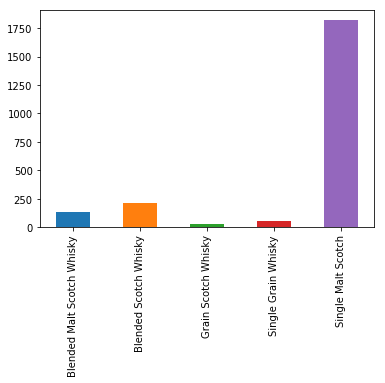

In [7]:
df['category'].value_counts().sort_index().plot.bar()

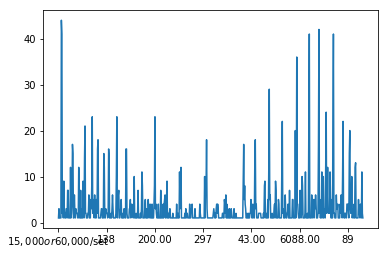

In [8]:
df['price'].value_counts().sort_index().plot.line()

In [9]:
# X = df['price']
# print(X.astype('float')) --> ValueError: could not convert string to float: '60,000/set'

print(type(df['price']))
for iter_price in df['price']:
    try:
        converted = float(iter_price)
    except ValueError:
        print(iter_price)

<class 'pandas.core.series.Series'>
$15,000 or $60,000/set
30,000
60,000/set
1,700
1,100
60,000
3,500
4,000
1,100
7,500
1,735
1,100
60,000/set
7,500
44/liter
1,500.00
1,400
60,000/set
60,000/set
